In [1]:
import numpy as np
from util import load_filtered
import csv
import pickle
from sklearn import linear_model, ensemble
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Step 1: Load the training/testing data

In [2]:
X_train = np.load('data/similarity/train_sim_features.npy')
y_train = np.load('data/similarity/train_sim_scores.npy')
X_test = np.load('data/similarity/test_sim_features.npy')
y_test = np.load('data/similarity/test_sim_scores.npy')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6905, 395) (6905,) (1211, 395) (1211,)


## Step 2: Construct the Model, Train

In [3]:
lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred_lin_reg = lin_reg_model.predict(X_test)

rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print("Linear Regression Root Mean Squared Error: ", rmse_lin_reg)
print("Linear Regression R2 score : ", r2_lin_reg)

Linear Regression Root Mean Squared Error:  0.205888551793366
Linear Regression R2 score :  -0.23094069524231164


In [4]:
rf_model = ensemble.RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Root Mean Squared Error: ", rmse_rf)
print("Random Forest R2 score : ", r2_rf)

Random Forest Root Mean Squared Error:  0.19437362020206064
Random Forest R2 score :  -0.0971029405603463


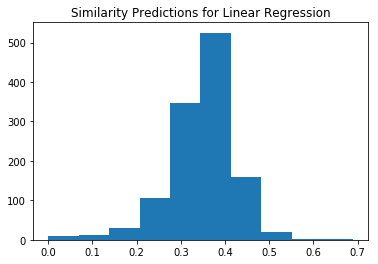

In [39]:
y_pred_copy = np.copy(y_pred_lin_reg)

y_pred_copy = np.abs(y_pred_copy)

plt.hist(y_pred_copy)
plt.title("Similarity Predictions for Linear Regression")
plt.savefig("linear_pred")
plt.show()

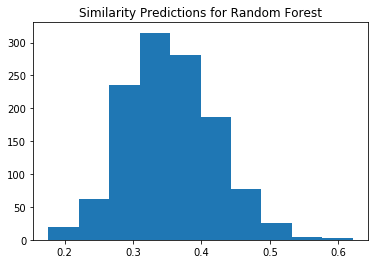

In [38]:
plt.hist(y_pred_rf)
plt.title("Similarity Predictions for Random Forest")
plt.savefig("rf_pred")
plt.show()

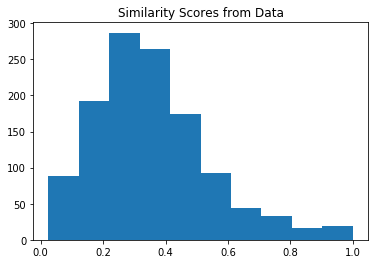

In [37]:
plt.hist(y_test)
plt.title("Similarity Scores from Data")
plt.savefig("y_test")
plt.show()

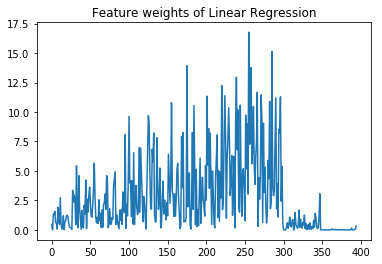

In [36]:
# plt.hist(lin_reg_model.coef_)
plt.plot(range(len(lin_reg_model.coef_)), np.abs(lin_reg_model.coef_))
plt.title("Feature weights of Linear Regression")
plt.savefig("linear_weights")

16


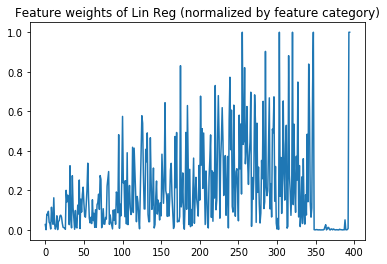

In [54]:
abs_coef = np.abs(lin_reg_model.coef_)
abs_coef[:300] = abs_coef[:300] / np.max(abs_coef[:300])
abs_coef[300:304] = abs_coef[300:304] / np.max(abs_coef[300:304])
abs_coef[304:347] = abs_coef[304:347] / np.max(abs_coef[304:347])
abs_coef[347:393] = abs_coef[347:393] / np.max(abs_coef[347:393])
abs_coef[393] = abs_coef[393] / abs_coef[393]
abs_coef[394] = abs_coef[394] / abs_coef[394]
plt.plot(range(len(lin_reg_model.coef_)), abs_coef)
# plt.hist(abs_coef)
plt.title("Feature weights of Lin Reg (normalized by feature category)")
plt.savefig("linear_weights_normalized")
print(np.argmax(abs_coef[304:347]))

In [29]:
np.argmax(np.abs(lin_reg_model.coef_)[300:])

47

In [30]:
lin_reg_model.coef_[347]

-3.0731794395162955

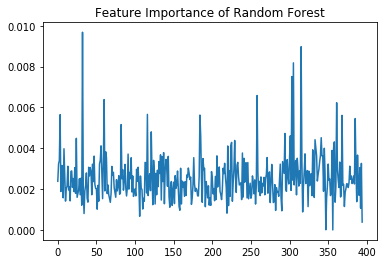

In [34]:
plt.plot(range(len(rf_model.feature_importances_)), np.abs(rf_model.feature_importances_))
plt.title("Feature Importance of Random Forest")
plt.savefig("rf_weights")

In [56]:
x = np.abs(rf_model.feature_importances_)
print(np.argmax(x[304:347]))

11


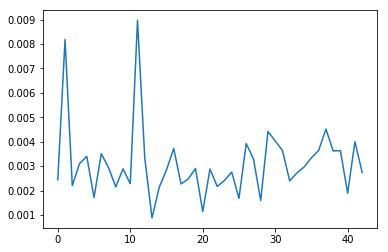

In [59]:
plt.plot(range(347-304),x[304:347])

In [60]:
x[304:347]

array([0.00244067, 0.00818023, 0.00220254, 0.00310219, 0.00339775,
       0.00171737, 0.00350691, 0.00294081, 0.00214688, 0.00288883,
       0.00228024, 0.00897024, 0.00334334, 0.00088008, 0.00213557,
       0.00284596, 0.00372433, 0.00226959, 0.0024721 , 0.00290539,
       0.00114227, 0.0028799 , 0.00216808, 0.00241326, 0.00275715,
       0.00167861, 0.00392208, 0.00329873, 0.00159091, 0.00441665,
       0.00403282, 0.00364209, 0.00239404, 0.00272164, 0.00296697,
       0.0033417 , 0.00364226, 0.00451546, 0.00362102, 0.00363445,
       0.00189147, 0.00399914, 0.00274395])